<a href="https://colab.research.google.com/github/HugoMagos0725/Matematicas_financieras/blob/main/CIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import numpy as np
from scipy import optimize
from scipy.integrate import odeint

from google.colab import drive 
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/HistoricalPrices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
tiempo=list(range(len(df['Date'])))
datos=df[' Open'].astype(float)[::-1]
datos.index=range(256)
datos

0      0.838
1      0.825
2      0.907
3      0.915
4      0.948
       ...  
251    5.032
252    5.148
253    5.212
254    5.230
255    5.225
Name:  Open, Length: 256, dtype: float64

In [ ]:
dt=1/365

def costo(x):
  a=x[0]
  b=x[1]
  sigma=x[2]
  def CIR(y,t,a,b,sigma):
    R=np.zeros(256)
    R[0]=y

    for i in range (1,256):
      R[i]=R[i-1]+a*(b-R[i-1])*dt+sigma*np.sqrt(R[i-1]*dt)*np.random.normal(0,1)
    return R

  y0=datos[0]

  R=CIR(y0,tiempo,a,b,sigma)

  c=sum(np.array(datos-R)**2)

  return c

op=optimize.minimize(costo,[5,5,6])
op.x

In [4]:
def CIR(y,t,a,b,sigma):
    R=np.zeros(256)
    R[0]=y

    for i in range (1,256):
      R[i]=R[i-1]+a*(b-R[i-1])*dt+sigma*np.sqrt(R[i-1]*dt)*np.random.normal(0,1)
    return R

R=CIR(datos[0],tiempo,op.x[0],op.x[1],op.x[2])

In [6]:
a=op.x[0]
b=op.x[1]
sigma=op.x[2]
y0=datos[0]
T=1
N=len(datos)
d=1/365

def traouh (a,b,sigma,y0,N,d):
  x=np.zeros(N+1)
  x[0]=y0
  E=np.zeros(N)
  for i in range (0,N):
    E[i]=np.random.normal(0,1)
    x[i+1]=x[i]+a*(b-x[i])*d+sigma*np.sqrt(d)*E[i]
  return x

nsimul=100
m=np.zeros((N+1,nsimul))
for i in range(0,nsimul):
  m[0:,i]=traouh(a,b,sigma,y0,N,d)

In [7]:
import math

nsimul=100
med=np.zeros(N+1)

for i in range(0,N+1):
  sum=np.sum(m[i])
  med[i]=1/nsimul*sum

rm=np.zeros((N+1,nsimul))
var=np.zeros(N+1)

for k in range (0,N+1):
  acum=0
  for i in range(0,nsimul):
    resta=m[k,i]-med[k]
    rm[k,i]=resta*resta
    acum=acum+rm[k,i]
  var[k]=(1/(nsimul-1))*(acum)

ka=1.995
inf=np.zeros(N+1)
sup=np.zeros(N+1)
for j in range(0,N+1): 
  sqrt3=math.sqrt(var[j])
  inf[j]=med[j]-ka*sqrt3
  sup[j]=med[j]+ka*sqrt3

In [14]:
import datetime
import pandas as pd
start = datetime.datetime.strptime("08-05-2022", "%d-%m-%Y")
end = datetime.datetime.strptime("08-05-2023", "%d-%m-%Y")
date_generated = pd.date_range(start, end)
j=np.zeros(N)
k=0
for i in range(len(date_generated)):
  if (i%7)<5:
    j[k]=i
    k=k+1
    if k==N:
      break
j=j.astype(int)
date_generated=date_generated[j]
date_generated

DatetimeIndex(['2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-15', '2022-05-16', '2022-05-17',
               '2022-05-18', '2022-05-19',
               ...
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
               '2023-04-27', '2023-04-30'],
              dtype='datetime64[ns]', length=256, freq=None)

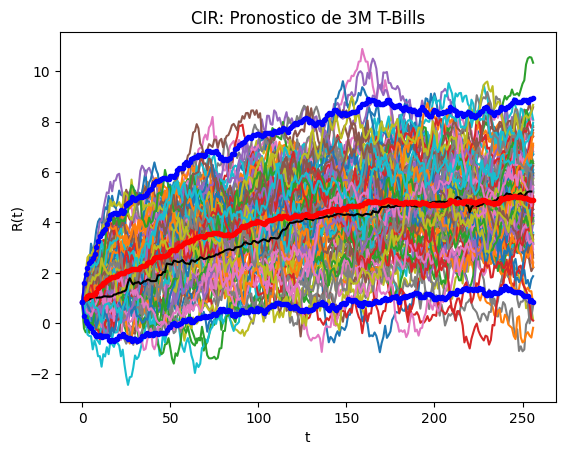

In [18]:
plt.plot(m)
plt.plot(tiempo,datos,color='k')
plt.plot(med,marker='o',markersize=3,color='red')
plt.plot(inf,marker='o',markersize=3,color='blue')
plt.plot(sup,marker='o',markersize=3,color='blue')
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('CIR: Pronostico de 3M T-Bills')
plt.savefig("CIR.jpg")